In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from scipy import stats
import plotly.express as px
plt.style.use('ggplot')   
%matplotlib inline

In [3]:
pl_fig = pd.read_csv("plr_pool.csv")


In [4]:
pl_fig.head()

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
0,770,101,2025-01-01,-658.564633,88.370757,-6.520442,6801.0,12.864316,67.336634,6.867572e+04,129.902398,679.957635
1,771,300,2024-12-31,-5932.033938,105.658146,-19.773446,20563.0,11.257951,68.543333,2.095750e+05,114.739326,698.583252
2,520,77,2024-12-29,1973.518878,425.575905,25.630115,7439.0,13.827467,96.610390,2.596088e+05,482.555692,3371.542474
3,526,60,2024-12-28,-5601.061807,239.606967,-93.351030,25358.0,38.613886,422.633333,2.591100e+05,394.559696,4318.500286
4,270,196,2024-12-30,11671.027161,1550.130989,59.546057,28379.0,29.317963,144.790816,2.950119e+06,3047.728553,15051.628905


In [5]:
pl_fig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          100 non-null    int64  
 1   visits      100 non-null    int64  
 2   last_visit  100 non-null    object 
 3   res_sum     100 non-null    float64
 4   res_std     100 non-null    float64
 5   res_mean    100 non-null    float64
 6   hands_sum   100 non-null    float64
 7   hands_std   100 non-null    float64
 8   hands_mean  100 non-null    float64
 9   bets_sum    100 non-null    float64
 10  bets_std    100 non-null    float64
 11  bets_mean   100 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 9.5+ KB


In [6]:
pl_fig.describe()

,id,visits,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,576.250000,205.47000,-10255.896369,332.911958,-48.821580,37578.980000,22.580135,182.254844,7.037805e+05,547.865337,3532.705708
std,252.007791,91.23623,12381.099671,382.130989,60.112741,35213.303613,12.759251,148.453205,7.703285e+05,809.037949,3900.255524
min,126.000000,60.00000,-43837.318539,83.257008,-224.095246,2563.000000,1.890359,19.126866,4.445843e+04,100.530168,608.657064
25%,384.500000,127.00000,-16966.847611,101.221912,-98.010960,12727.750000,12.172300,69.549834,1.634117e+05,122.379618,692.768638
50%,579.000000,210.00000,-6009.153542,231.453619,-27.440118,21932.000000,14.603222,99.278313,5.105798e+05,381.398335,3448.933209
75%,794.250000,267.75000,-2416.153170,425.263895,-13.597049,52675.750000,37.590834,390.329481,1.007798e+06,480.862204,4017.550081
max,992.000000,602.00000,31122.084065,1550.130989,232.254359,122757.000000,46.308098,433.073826,3.827885e+06,3235.828132,15923.399605


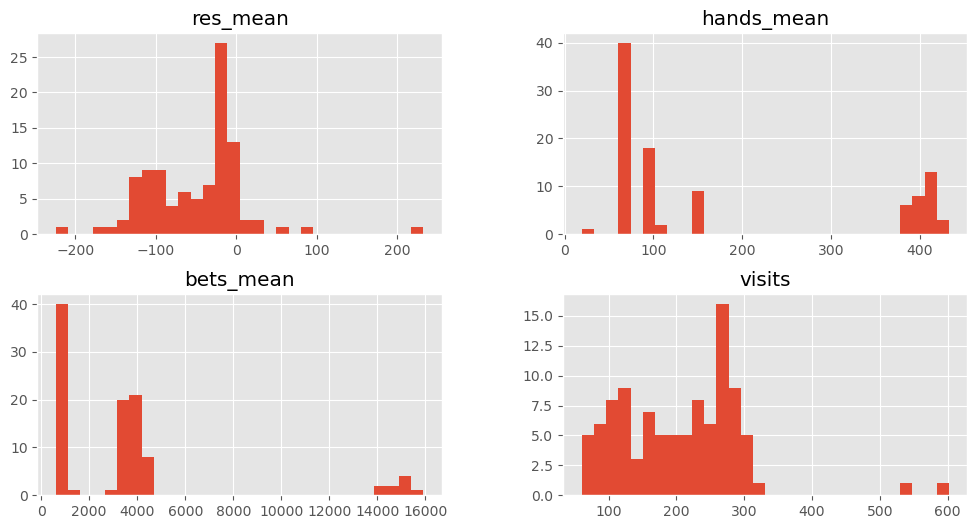

In [7]:
pl_fig[['res_mean','hands_mean','bets_mean', 'visits']].hist(figsize=(12,6), bins=30);

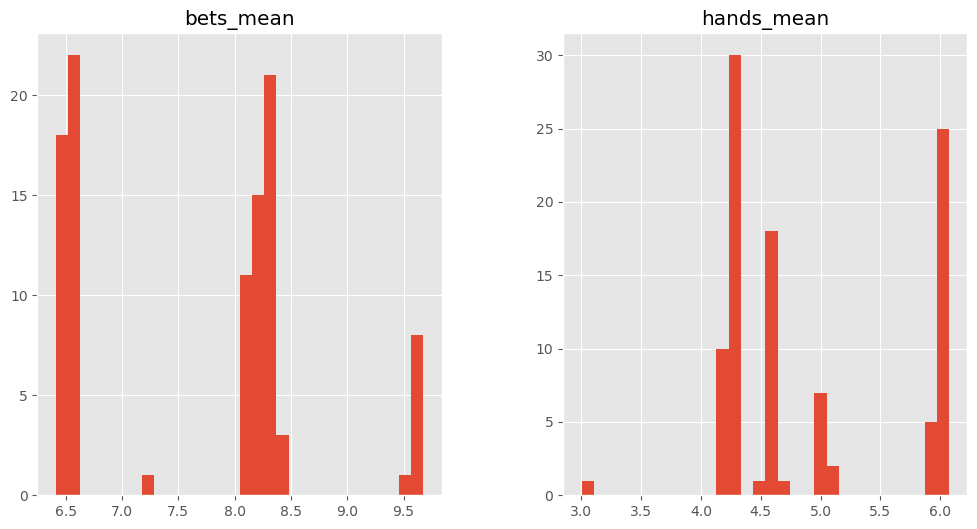

In [8]:
g = (
    pl_fig[['bets_mean', 'hands_mean']]
    .apply(lambda w: np.log(w + 1))
    .hist(figsize=(12,6), bins=30)
)

g;

In [9]:
# !pip install plotly

In [10]:
# px.scatter_3d(
#     pl_fig,
#     x='res_sum',
#     y='bets_mean',
#     z='visits',
#     color='visits'
# ).show(renderer='browser')

In [11]:
px.scatter_3d(
    pl_fig,
    x='res_sum',
    y='bets_mean',
    z='visits',
    color='visits'
).show(renderer='browser')

In [12]:
pl_fig['visits_quar'] = pd.qcut(pl_fig['visits'],4,['1','2','3','4'])
pl_fig['res_sum_quar'] = pd.qcut(pl_fig['res_sum'],4,['1','2','3','4'])
pl_fig['bets_mean_quar'] = pd.qcut(pl_fig['bets_mean'],4,['1','2','3','4'])

In [13]:
pl_fig

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean,visits_quar,res_sum_quar,bets_mean_quar
0,770,101,2025-01-01,-658.564633,88.370757,-6.520442,6801.0,12.864316,67.336634,6.867572e+04,129.902398,679.957635,1,4,1
1,771,300,2024-12-31,-5932.033938,105.658146,-19.773446,20563.0,11.257951,68.543333,2.095750e+05,114.739326,698.583252,4,3,2
2,520,77,2024-12-29,1973.518878,425.575905,25.630115,7439.0,13.827467,96.610390,2.596088e+05,482.555692,3371.542474,1,4,2
3,526,60,2024-12-28,-5601.061807,239.606967,-93.351030,25358.0,38.613886,422.633333,2.591100e+05,394.559696,4318.500286,1,3,4
4,270,196,2024-12-30,11671.027161,1550.130989,59.546057,28379.0,29.317963,144.790816,2.950119e+06,3047.728553,15051.628905,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,753,242,2024-12-26,-13991.078097,425.007177,-57.814372,22676.0,15.677612,93.702479,8.006583e+05,553.554870,3308.505411,3,2,2
96,241,211,2024-12-29,19522.954148,1405.996035,92.525849,30359.0,29.415961,143.881517,3.007882e+06,2914.448372,14255.364718,3,4,4
97,245,284,2024-12-31,-2873.214454,94.531084,-10.116952,18711.0,12.888083,65.883803,1.876184e+05,129.231013,660.628137,4,3,1
98,763,275,2024-12-31,-30253.729746,226.325396,-110.013563,107750.0,39.741662,391.818182,1.033575e+06,381.215548,3758.453388,4,1,3


In [14]:
pl_fig['vrb']= pl_fig.visits_quar.astype(str) + pl_fig.res_sum_quar.astype(str)+pl_fig.bets_mean_quar.astype(str)

In [15]:
pl_fig

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean,visits_quar,res_sum_quar,bets_mean_quar,vrb
0,770,101,2025-01-01,-658.564633,88.370757,-6.520442,6801.0,12.864316,67.336634,6.867572e+04,129.902398,679.957635,1,4,1,141
1,771,300,2024-12-31,-5932.033938,105.658146,-19.773446,20563.0,11.257951,68.543333,2.095750e+05,114.739326,698.583252,4,3,2,432
2,520,77,2024-12-29,1973.518878,425.575905,25.630115,7439.0,13.827467,96.610390,2.596088e+05,482.555692,3371.542474,1,4,2,142
3,526,60,2024-12-28,-5601.061807,239.606967,-93.351030,25358.0,38.613886,422.633333,2.591100e+05,394.559696,4318.500286,1,3,4,134
4,270,196,2024-12-30,11671.027161,1550.130989,59.546057,28379.0,29.317963,144.790816,2.950119e+06,3047.728553,15051.628905,2,4,4,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,753,242,2024-12-26,-13991.078097,425.007177,-57.814372,22676.0,15.677612,93.702479,8.006583e+05,553.554870,3308.505411,3,2,2,322
96,241,211,2024-12-29,19522.954148,1405.996035,92.525849,30359.0,29.415961,143.881517,3.007882e+06,2914.448372,14255.364718,3,4,4,344
97,245,284,2024-12-31,-2873.214454,94.531084,-10.116952,18711.0,12.888083,65.883803,1.876184e+05,129.231013,660.628137,4,3,1,431
98,763,275,2024-12-31,-30253.729746,226.325396,-110.013563,107750.0,39.741662,391.818182,1.033575e+06,381.215548,3758.453388,4,1,3,413


In [16]:
clusters = pl_fig['vrb'].value_counts()

In [17]:
good_cluster = clusters[clusters >=3].index.values

In [18]:
good_cluster

array(['142', '141', '432', '323', '313', '431', '413', '322', '231',
       '414', '232', '314', '214', '124', '224'], dtype=object)

In [19]:
px.scatter_3d(
    pl_fig[pl_fig.vrb.isin(good_cluster)],
    x='res_sum',
    y='bets_mean',
    z='hands_sum',
    color='vrb'
).show(renderer='iframe')

In [20]:
px.scatter_3d(
    pl_fig,
    x='res_sum',
    y='res_std',
    z='hands_sum',
    color='res_mean'
# ).show(renderer='iframe')
).show(renderer='browser')